# Исследование интернет-магазина «Стримчик»

В ходе проекта нам предстоит проанализировать данные интернет-магазина "Стримчик". Нам необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

План работы:
1. Изучить исходные данные
2. Подготовить данные для исследования
3. Провести исследовательских анализ данных на выявление закономерностей 
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
6. Подвести итоги и сделать общий вывод о результатах исследования

## Загрузка данных

Откроем файл и изучим основную информацию.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
print(data.head(10))
data.info()

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

В таблице с данными 16715 строк и 11 столбцов. Уже в первых 10 строках видно большое количество пропущенных значений, стоит изучить их детальнее. Также смущают названия столбцов, нужно привести их к нижнему регистру.

## Подготовка данных

### Изменение названий столбцов

В исходных данных названия столбцов содержат символы обеих регистров, стоит все привести к нижнему регистру для дальнейшего удобства в работе с данными.

In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов данных

Еще раз рассмотрим, к какому типу данных принадлежит каждый столбец:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Год выпуска игры может перевести в целочисленный тип данных, предварительно удалив пропуски, ведь мы не сможем их достоверно восстановить, таких пропусков всего 269 из 16715 строк.

In [6]:
data.dropna(subset=['year_of_release'], inplace=True)

In [7]:
data['year_of_release'] = data['year_of_release'].astype('int')

Так же вызывает вопросы столбец user_score с оценкой пользователей. Изменим тип данных со строки до вещественного, так как встречаются дробные числа.

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)


При попытке впервые сделать это, оказалось, что кроме чисел и пропусков есть строки "tbd", то есть игре не присвоен рейтинг из-за недостатка оценок. Посмотрим, сколько строк с таким значением и примем решение удалить их или заменить значение на что-то другое.

In [9]:
data[data['user_score'] == 'tbd']['name'].count()

2376

Таких значений довольно много. Так как "tbd" означает, что игре не присвоен рейтинг, то для нас это аналогично пропущенному значению. Заменим эти значения на NaN.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

Посмотрим, что получилось:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Оба столбца изменили свои типы данных. Перейдем к рассмотрению многочисленных пропусков.

### Обработка пропусков

Посчитаем пропуски в каждом столбце, напомню, что мы уже удалили 269 строк из-за пропусков в столбце с годом выпуска игры.

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Довольно много пропусков в последних трех столбцах с оценкой критиков, пользователей, а также рейтингом от организации ESRB. Последний мы не сможем заполнить, так как не можем оценить каждую игру и присвоить ей определенную возрастную категорию, придется оставить эти пропуски без изменений.

Что касается оценок критиков и пользователей, заполним пропуски нулями, так как не хочется лишаться половины данных. Пропуски могли появится, потому что критики еще не оценивали игру на момент создания датасета, а пользователи просто не всегда ставят оценку игре, так как не видят в этом необходимости. Вполне может быть, что игры с пропущенными значениями оценок недостаточно популярны.

0 - оценка, которую пользователи не могут поставить, так как отсчет начинается с единицы. Заполнение медианным или средним значением может сильно исказить данные, поэтому все же остановимся на нуле. 

In [13]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

В данных есть по 2 пропуска в столбцах с названием игры и жанром, можем удалить эти строки, так как их совсем мало.

In [14]:
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

In [15]:
# проверим, сколько пропусков осталось
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Видим, что остались только пропуски в столбце с рейтингом, которые мы не можем изменить. Мы удалили минимум строк и сохранили много нужных данных.

**Причины, которые могли привести к пропускам:**

К пропускам могут приводить технические ошибки, например сбои при выгрузке данных, или человеческие ошибки. Разберем, почему могли появиться пропуски в столбцах, где их много:
1. Год выпуска игры - возможно это техническая ошибка, так как дата выхода важна для каждой игры и изначально пропусков в таких данных быть не должно.
2. Пропуски в столбцах name и genre скорее всего появились из-за невнимательности при заполнении, их очень мало
3. Самые многочисленные пропуски в столбцах с оценками. Почти в половине данных пропущены значения оценок критиков и пользователей. Это можно объяснить тем, что до критиков доходят только самые популярные игры, которые они оценивают. Более того, возможно, игра только появилась и запрос на оценку игры критиками еще не поступил. Что касается пользователей, они могут просто не оставлять свою оценку игры, так как это необязательно, в каких-то играх слишком мало оценок, чтобы подсчитать среднюю, а в каких-то оценок нет совсем.
4. Пропуски в рейтинге. Во многих данных нет значения возрастной категории, это может быть связано с тем, что игры еще не прошли проверку и категория им не присвоена, или это технический сбой.

### Добавление нового столбца

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. Эти данные помогут нам в дальнейшем анализе.

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


### Проверка на дубликаты

Посмотрим, есть ли в данных полные дубликаты:

In [17]:
data.duplicated().sum()

0

Явных дубликатов нет. Изучим неявные дубликаты в столбце названия платформы.

In [18]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов нет, посмотрим еще на уникальные значения в столбце с жанром игры.

In [19]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Все в порядке, можно переходить к исследовательскому анализу данных!

## Исследовательский анализ данных

### Количество выпущенных игр за каждый год

Посмотрим, сколько игр выпускалось в разные годы и сделаем вывод: важны ли данные за все периоды?

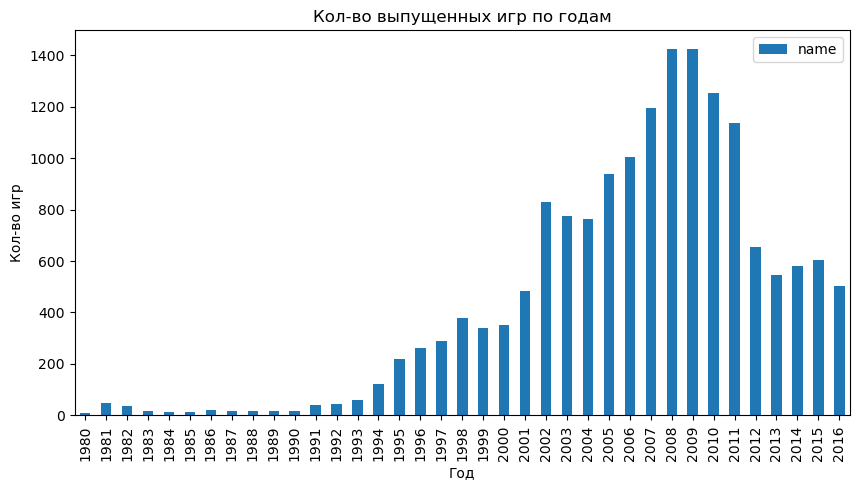

In [20]:
games_for_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(kind = 'bar', y='name', figsize = (10,5), fontsize = 10)
plt.title('Кол-во выпущенных игр по годам', fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Кол-во игр', fontsize=10)
plt.show()

По графику видно, что до 1994 года игры практически не выпускали. Далее пошел рост выпуска компьютерных игр. В 2002 году наблюдается сильный скачок, а 2008 и 2009 годы стали лидерами по количеству выпущенных игр, после этого снова наблюдается спад, возожно из-за развития vr-игр или мобильных приложений, но, тем не менее, игр все равно выпускалось довольно много.

В дальнейшем анализе можем считать, что данные до 1994 года нам не важны, так как выпуск был совсем маленький.

### Изучение продаж по платформам

Теперь посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Далее выясним: за какой характерный срок появляются новые и исчезают старые платформы?

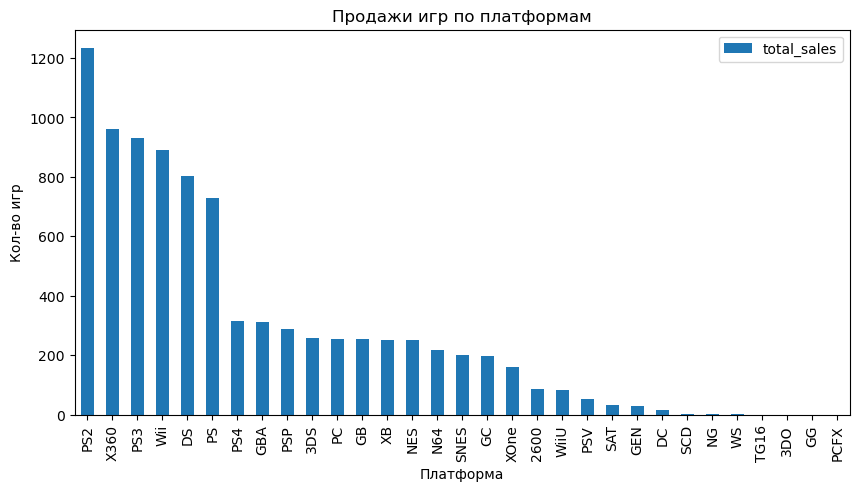

In [58]:
games_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
games_platform.plot(kind = 'bar', y='total_sales', figsize = (10,5), fontsize = 10)
plt.title('Продажи игр по платформам', fontsize=12)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Кол-во игр', fontsize=10)
plt.show()

Лидером является PS2, у него наибольшие продажи за все время. Далее, практически на одном уровне идут X360, PS3 и Wii. Завершает пятерку лидеров платформа DS. PS находится довольно близко по продажам, поэтому возьмем его тоже в список лидеров, после него уже идет весомый отрыв. Для этих 6 платформ построим графики распределения продаж по годам.

In [22]:
leader_games_platform = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii','DS', 'PS']").pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
leader_games_platform

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


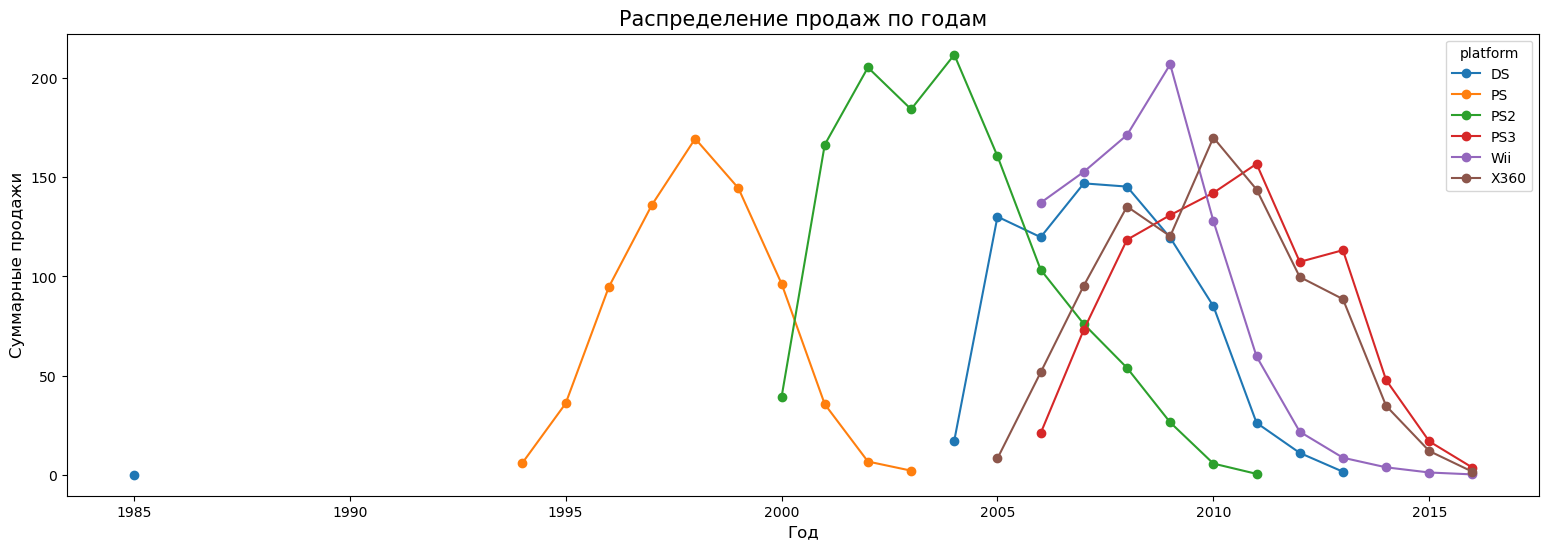

In [57]:
leader_games_platform.plot(style='o-', figsize=(19,6))
plt.title('Распределение продаж по годам', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()

Теперь нужно выяснить: за какой характерный срок появляются новые и исчезают старые платформы?

Итак:
- PS существовала примерно с 1994 и до 2003, то есть 9 лет
- PS2 была на рынке с 2000 года примерно до 2011, то есть 11 лет 
- DS существовала с 2004 по 2013 год, то есть тоже 9 лет 
- Wii пользовалась спросом с 2006 до момента проведения исследования, но по графику видно, что сейчас игры на этой платформе почти не выпускаются
- Х360 появился в 2005 году и аналогично Wii еще не ушел с рынка игр, но их выпуск сильно снизился и близок к 0
- PS3 существует с 2006 года до момента сбора данных, но ситуация такая же, как у Wii и X360

По завершенным периодам можно сделать вывод, что платформа в среднем существует около 10 лет. Те платформы, которые еще не ушли с рынка на момент исследования, уйдут совсем скоро, так как им на замену уже пришли новые и сместили их.

### Анализ продаж в актуальное время 

Ранее мы уже строили график по количеству выпущенных игр ежегодно. На его основе предположим, что актуальным периодом будет считаться промежуток с 2014 года до 2016. Возьмем именно последние 3 года, так как индустрия компьютерных игр очень динамична, и при изучении слишком большого отрезка времени можно получить недостоверный прогноз на 2017 год.

Рассмотрим подробнее, какие платформы лидируют по продажам, растут или падают, а затем выберем несколько потенциально прибыльных платформ.

In [24]:
actual_leaders = data.query('year_of_release >= 2014').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_leaders

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


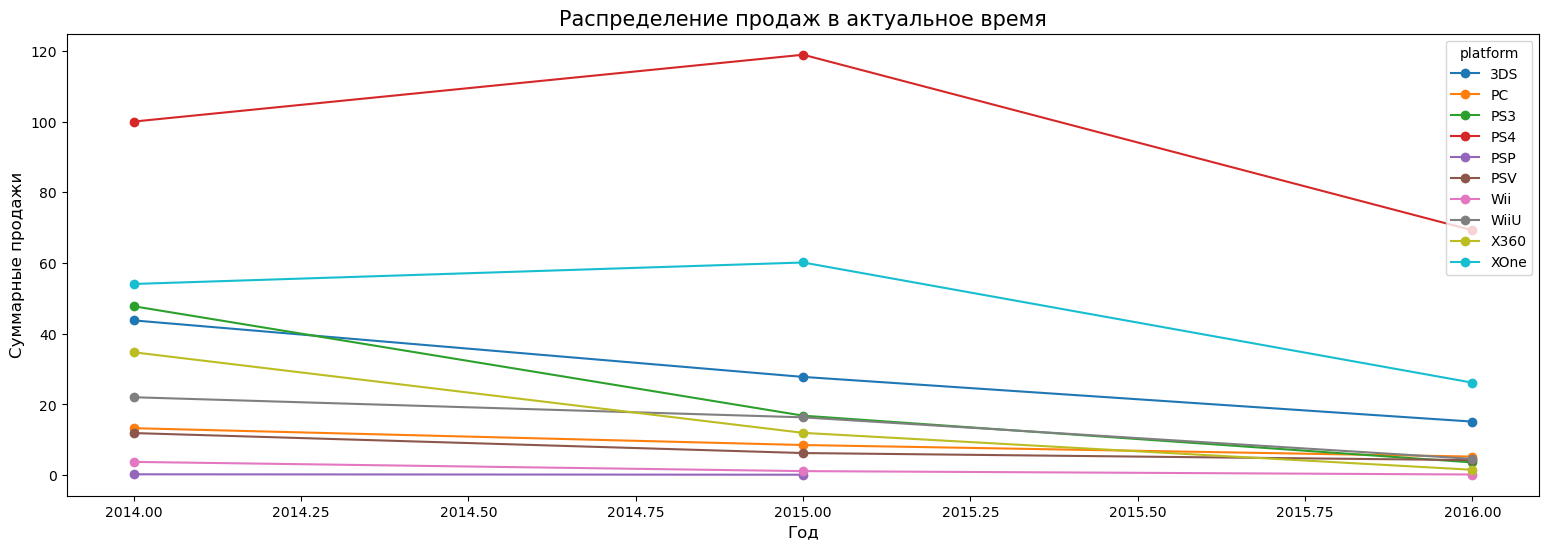

In [56]:
actual_leaders.plot(style='o-', figsize=(19,6))
plt.title('Распределение продаж в актуальное время', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()

На графике много данных и на первый взгляд он выглядит запутанным, тем не менее, на его основе можно выделить потенциальных лидеров по суммарным продажам.

На графике все кроме трех линий стремятся к нулю, то есть только три платформы, которые не собираются прекращать выпуск игр, их мы и выделим в качестве лидирующих:
- PS4
- XOne
- 3DS

### Анализ глобальных продаж игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишием результат.

In [26]:
top_platforms = data.query('platform == ["PS4", "XOne", "3DS"]')
top_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


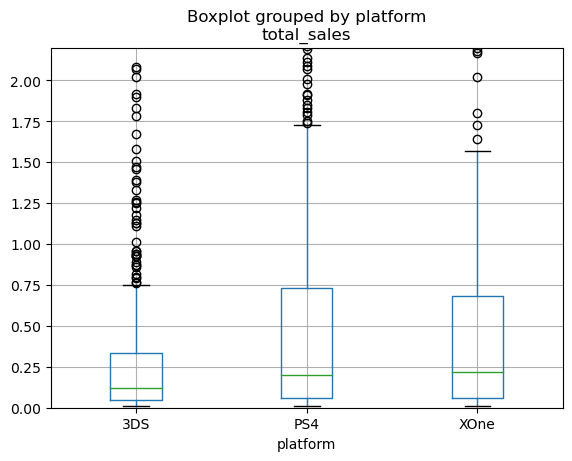

In [27]:
top_platforms.boxplot(column='total_sales', by='platform')
plt.ylim(0, 2.2)
plt.show()

На диаграмме видно очень много выбросов. Медианы варьируются от 0,1 до 0,2 млн. Из трех лидеров выделяет 3DS, у него самые низкие показатели: максимальный-0,75, пока у остальных в два раза больше. Больший потенциал у платформы PS4- у него лучшие показатели.

###  Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Для рассмотрения возьмем PS4, так как ранее выявили, что она лидер на момент проведения исследования. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [28]:
ps4 = data[(data['platform'] == 'PS4') & (data['critic_score'] != 0)]

Влияние оценок критиков на продажи:

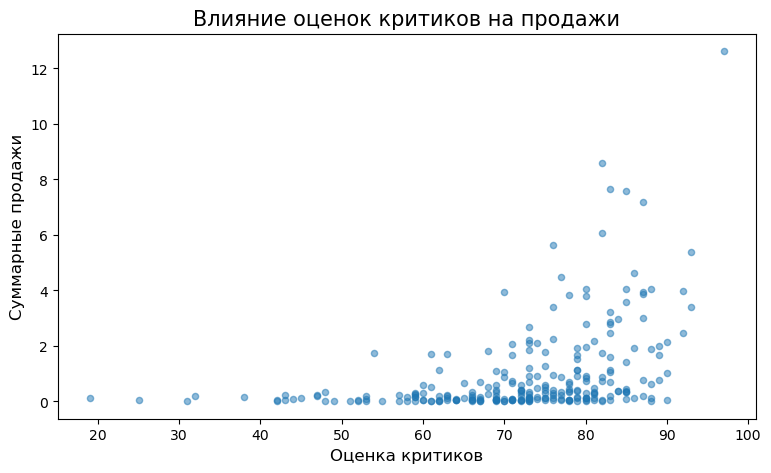

In [54]:
# построим диаграмму рассеяния
ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(9,5),alpha=0.5)
plt.title('Влияние оценок критиков на продажи', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()

По графику заметно, что чем выше оценка критиков, тем больше суммарные продажи платформы, это логично, ведь плохую игру пользователи бы не покупали, а за хорошую они готовы платить.

Теперь рассмотрим влияние оценок пользователей на продажи:

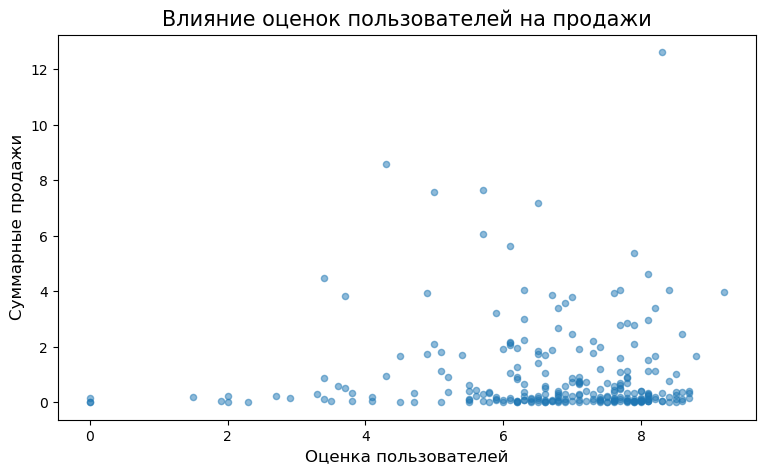

In [55]:
ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(9,5), alpha=0.5)
plt.title('Влияние оценок пользователей на продажи', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()

Графики немного отличаются, но схожи в том, что большему среднему значению оценки соответствует большие средние продажи. На диаграмме есть выбросы, которые могут быть связаны с субъективностью пользователей.

Теперь посчитаем корреляцию между отзывами и продажами:

In [31]:
ps4_cor = ps4['critic_score'].corr(ps4['total_sales'])
print('Коэффициент корреляции по отзывам критиков равен', ps4_cor)

Коэффициент корреляции по отзывам критиков равен 0.40656790206178095


Корреляция положительная, то есть наши предположения подтвердились. Оценка критиков действительно сильно влияет на цену и продажи игр.

Посмотрим на оценку пользователей:

In [32]:
ps4_cor2 = ps4['user_score'].corr(ps4['total_sales'])
print('Коэффициент корреляции по отзывам пользователей равен', ps4_cor2)

Коэффициент корреляции по отзывам пользователей равен -0.0027302031571732836


Связь очень слабая. Оценки пользователей почти не влияют на глобальные продажи. Это можно объяснить тем, что своей оценкой они выражают лишь свое мнение по поводу игры, причем уже после ее покупки, их мнение не такое авторитетное для других пользователей, которые хотят определиться, стоит ли им покупать игру, по сравнению с мнением критиков.

### Влияние оценок на продажи других платформ

Рассмотрим как влияют оценки критиков и пользователей на показатели глобальных продаж других топовых платформ.

In [33]:
xone = data[(data['platform'] == 'XOne') & (data['critic_score'] != 0)]
xone_cor = xone['critic_score'].corr(xone['total_sales'])
print('Коэффициент корреляции по отзывам критиков равен', xone_cor)

Коэффициент корреляции по отзывам критиков равен 0.4169983280084017


In [34]:
xone_cor2 = xone['user_score'].corr(xone['total_sales'])
print('Коэффициент корреляции по отзывам пользователей равен', xone_cor2)

Коэффициент корреляции по отзывам пользователей равен -0.008912891419336011


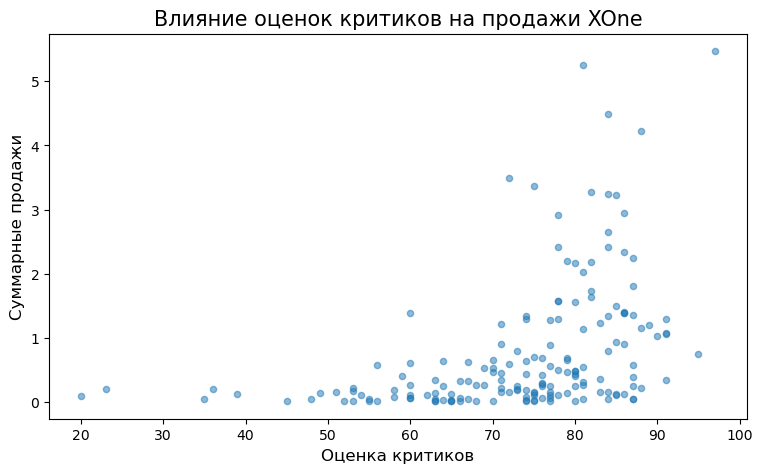

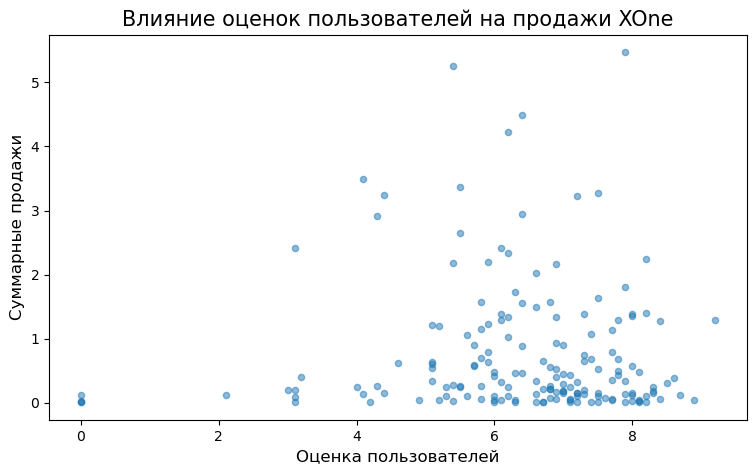

In [35]:
xone.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(9,5),alpha=0.5)
plt.title('Влияние оценок критиков на продажи XOne', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()
xone.plot(kind='scatter', x='user_score', y='total_sales', figsize=(9,5), alpha=0.5)
plt.title('Влияние оценок пользователей на продажи XOne', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()

Ситуация аналогично PS4, похожая зависимость между отзывами и продажами, что у критиков, что у покупателей.

Рассмотрим последнего лидера 3DS:

In [36]:
ds3 = data[(data['platform'] == '3DS') & (data['critic_score'] != 0)]
ds3_cor = ds3['critic_score'].corr(ds3['total_sales'])
print('Коэффициент корреляции по отзывам критиков равен', ds3_cor)

Коэффициент корреляции по отзывам критиков равен 0.3487397305984834


In [37]:
ds3_cor2 = ds3['user_score'].corr(ds3['total_sales'])
print('Коэффициент корреляции по отзывам пользователей равен', ds3_cor2)

Коэффициент корреляции по отзывам пользователей равен 0.21952217794689524


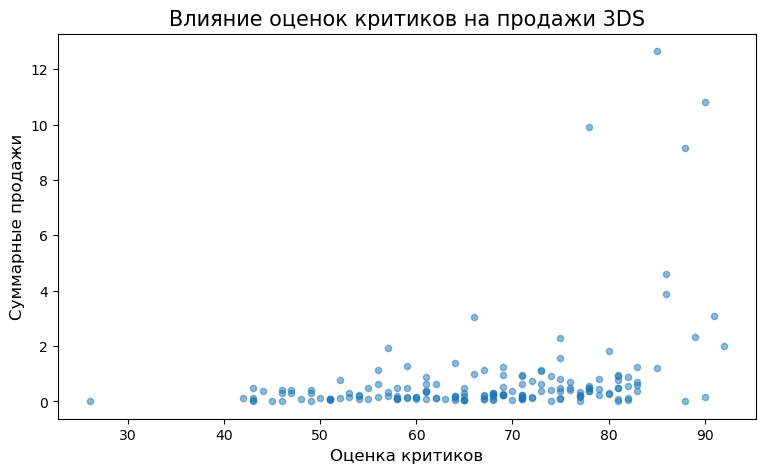

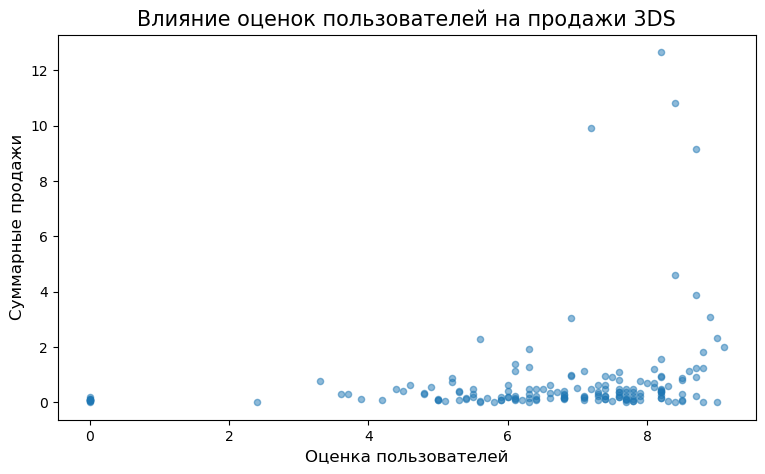

In [38]:
ds3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(9,5),alpha=0.5)
plt.title('Влияние оценок критиков на продажи 3DS', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()
ds3.plot(kind='scatter', x='user_score', y='total_sales', figsize=(9,5), alpha=0.5)
plt.title('Влияние оценок пользователей на продажи 3DS', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()

Здесь ситуация немного отличается: корреляция отзывов критиков чуть меньше, то есть связь слабее. Удивляет, что коэффициент корреляции по отзывам покупателей больше 0.2, то есть в данной ситуации, по сравнению с предыдущими, прослеживается взаимосвязь оценок пользователей с глобальными продажами.

### Анализ жанров 

Посмотрим на общее распределение игр по жанрам. Выясним, какие жанры самые прибыльные и есть ли жанры, которые выделяются по продажам.

In [39]:
genre_pivot = data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_pivot.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


По таблице уже видно, что самыми популярными жанрами являются action, sports, shooter. Самые "неприбыльные" жанры: puzzle, adventure, strategy. Можно обосновать это тем, что на разработку таких игр уходит меньше средств и они не такие популярные и ожидаемые как спортивные игры или стрелялки, соответственно их цена и суммарные продажи будут меньше, чем у лидирующих жанров.

Интересно посмотреть, как распределено количество игр и продажи. 

Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть медианные продажи:

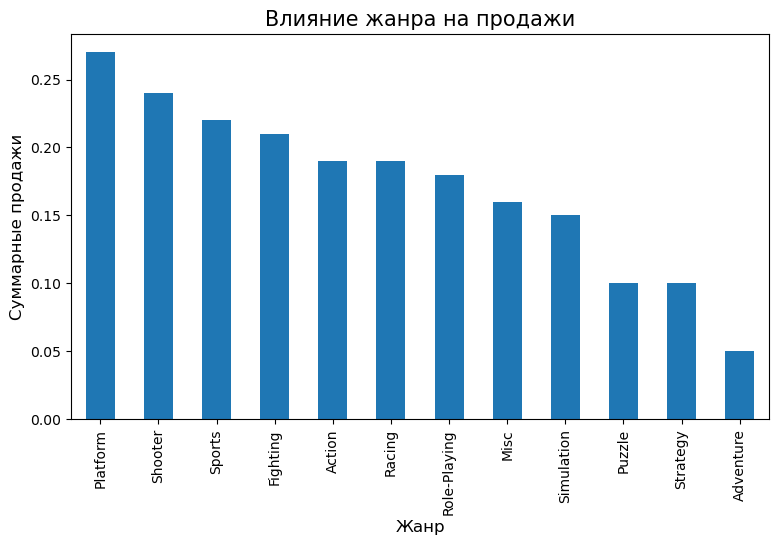

In [40]:
genres = data.groupby('genre').agg({'name': 'count', 'total_sales': 'median'}).sort_values(by='total_sales', ascending=False)

genres['total_sales'].plot(kind='bar', figsize=(9,5))
plt.title('Влияние жанра на продажи', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.show()

По графику видно, что action и sports лидируют. Shooter входит в тройку по продажам. Интересно, что жанр приключения имеет один из самых маленьких показателей по продажам. Остальные жанры распределены нормально, вопросов не возникает.

## Портрет пользователя каждого региона

Опишем для пользователя каждого региона:
- Самые популярные платформы (топ-5) и опишем различия в долях продаж.
- Самые популярные жанры (топ-5)
- Влияние рейтинга ESRB на продажи в регионе

### Самые популярные платформы в регионах

In [41]:
def regional_top (datas, sales):
    pivot_table = data.groupby(datas)[sales].sum().sort_values(ascending=False).head()\
    .plot(kind='bar', figsize=(10,6))
    plt.ylabel('Суммарные продажи', fontsize=12)

Топовые платформы в Северной Америке:

Text(0.5, 0, 'Платформа')

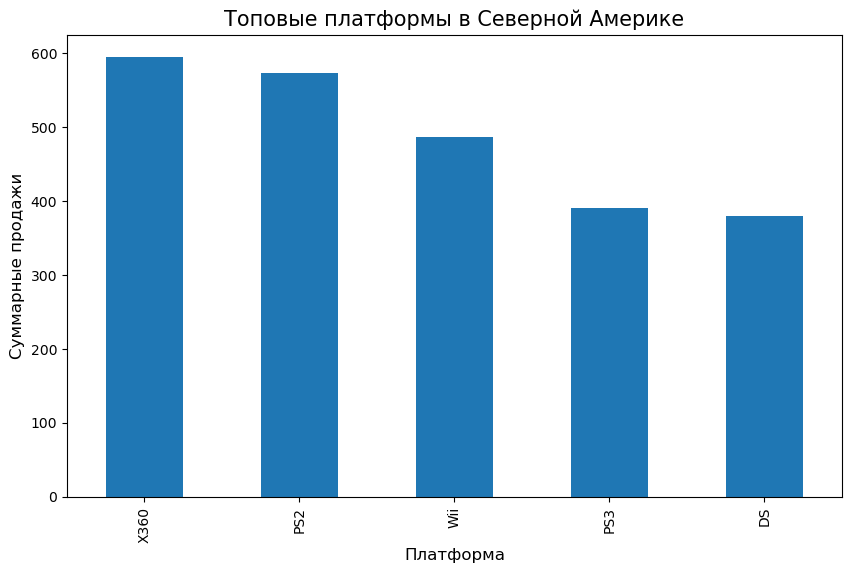

In [42]:
regional_top('platform', 'na_sales')
plt.title('Топовые платформы в Северной Америке', fontsize=15)
plt.xlabel('Платформа', fontsize=12)

В пятерку самых популярных платформ в Северной Америке входят X360, PS2, Wii, PS3, DS. С ними мы уже знакомы, они и ранее были лидерами.

Рассмотрим Европу:

Text(0.5, 0, 'Платформа')

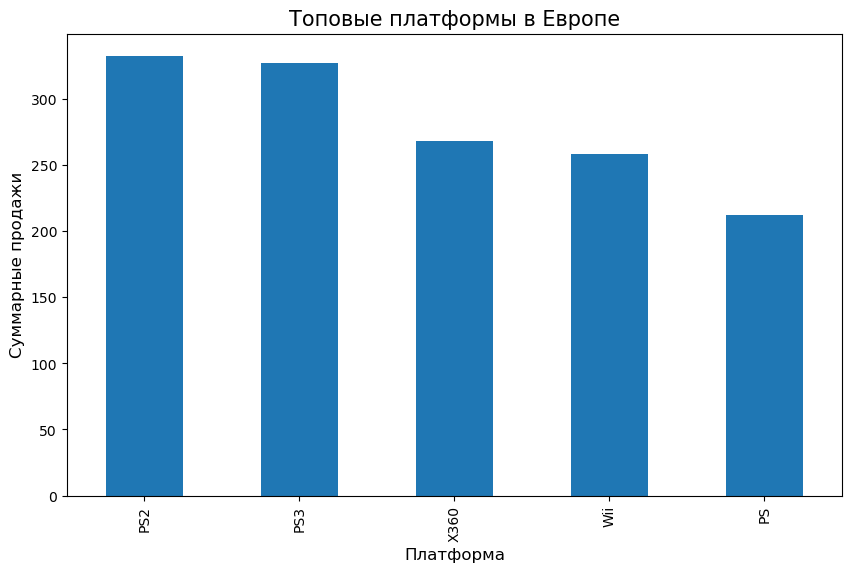

In [43]:
regional_top('platform', 'eu_sales')
plt.title('Топовые платформы в Европе', fontsize=15)
plt.xlabel('Платформа', fontsize=12)

В Европе самыми популярными платформами являются PS2 и PS3. Потом идут X360 и Wii, тоже примерно на одном уровне. Завершает пятерку старенький PS.

Япония:

Text(0.5, 0, 'Платформа')

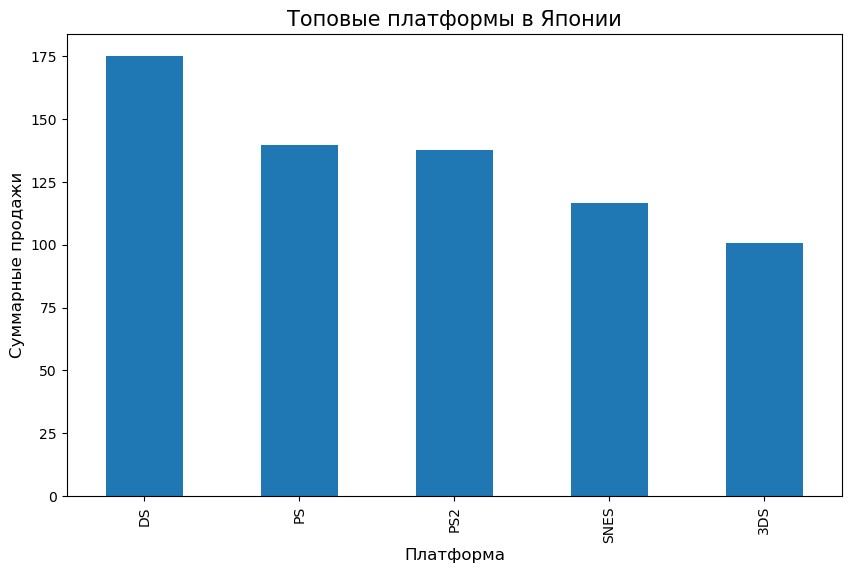

In [44]:
regional_top('platform', 'jp_sales')
plt.title('Топовые платформы в Японии', fontsize=15)
plt.xlabel('Платформа', fontsize=12)

Здесь вперед вырвался DS, за ним идут PS и PS2. На четвертом месте платфрма, которую мы видим впервые-SNES. И наконец, 3DS.

Различия в предпочтениях и долях продаж могут быть связаны с предпочтениями жителей конкретных регионов, многие предпочитают платформы, произведенные в своей стране, кто-то гонится за новинками, а кто-то привык играть на своей старой и проверенной консоли.

### Самые популярные жанры в регионах

Теперь аналогично рассмотрим жанры, которые популярны в каждом регионе. Начнем снова с Америки.

Text(0.5, 0, 'Жанр')

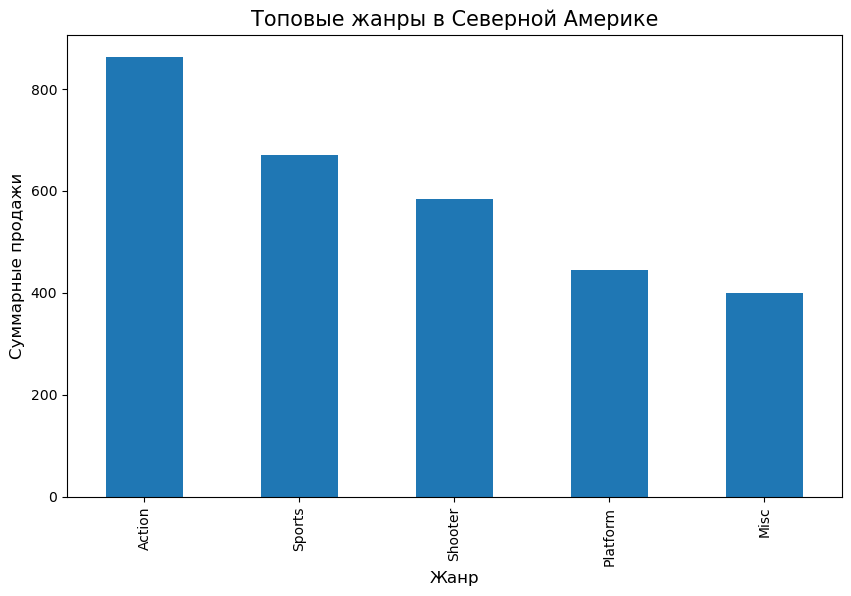

In [45]:
regional_top('genre', 'na_sales')
plt.title('Топовые жанры в Северной Америке', fontsize=15)
plt.xlabel('Жанр', fontsize=12)

Уже знакомые нам жанры снова стали лидерами. Так же в пятерку пошли platform и Misc.

Посмотрим, различаются ли вкусы у людей в других регионах. Итак, Европа:

Text(0.5, 0, 'Жанр')

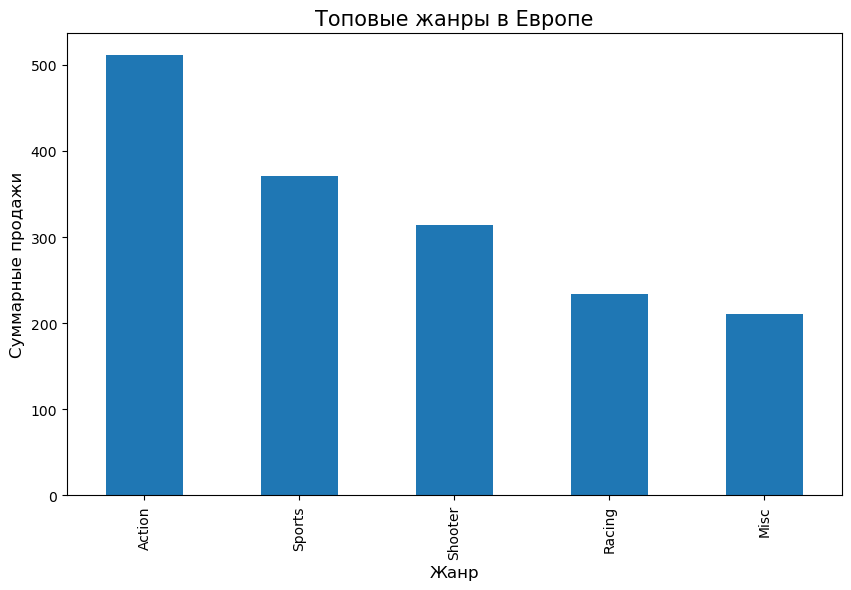

In [46]:
regional_top('genre', 'eu_sales')
plt.title('Топовые жанры в Европе', fontsize=15)
plt.xlabel('Жанр', fontsize=12)

Европейский топ-5 очень схож с Американским, за исключением 4 места, которое занимают гонки, в то время как в Америке-platform.

Осталось проанализировать вкусы японцев:

Text(0.5, 0, 'Жанр')

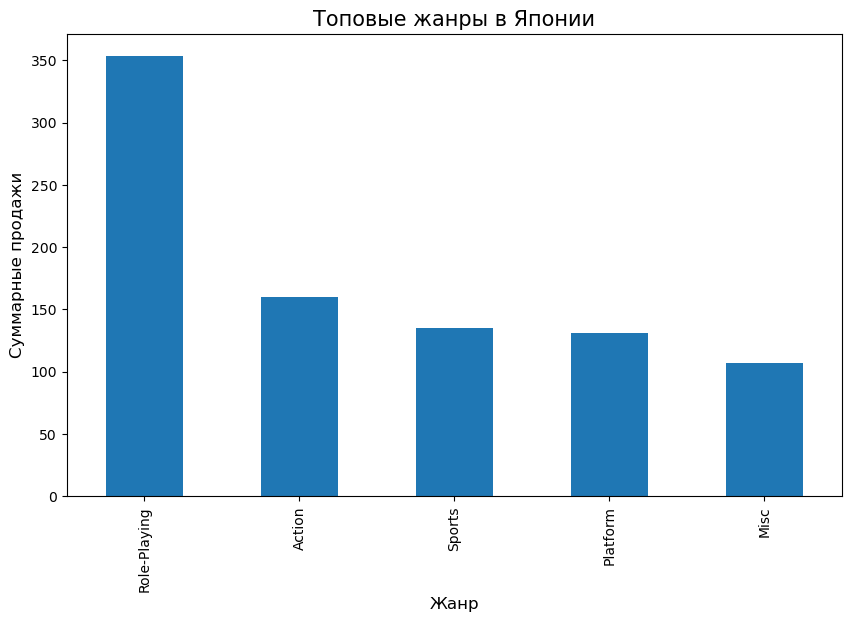

In [47]:
regional_top('genre', 'jp_sales')
plt.title('Топовые жанры в Японии', fontsize=15)
plt.xlabel('Жанр', fontsize=12)

На первое месте встали ролевые игры, которых не было в предыдущих топах вообще, экшн и спортивные игры тоже популярны, но на фоне ролевых игр доля всех оставшихся довольно мала. Как и в Америке топ закрывает platform и Misc.

### Влияение рейтинга ESRB на продажи в отдельном регионе

Ознакомимся со значениями этого рейтинг:
1. ЕС- для детей маленького возраста
2. Е - для всех
3. Е10+ - для всех старше 10 лет
4. Т - для подростков от 13 лет
5. М - для лиц старше 17 лет
6. АО - только для взрослых
7. К-А- для всех 

Снова начнем с Америки:

Text(0.5, 0, 'Рейтинг')

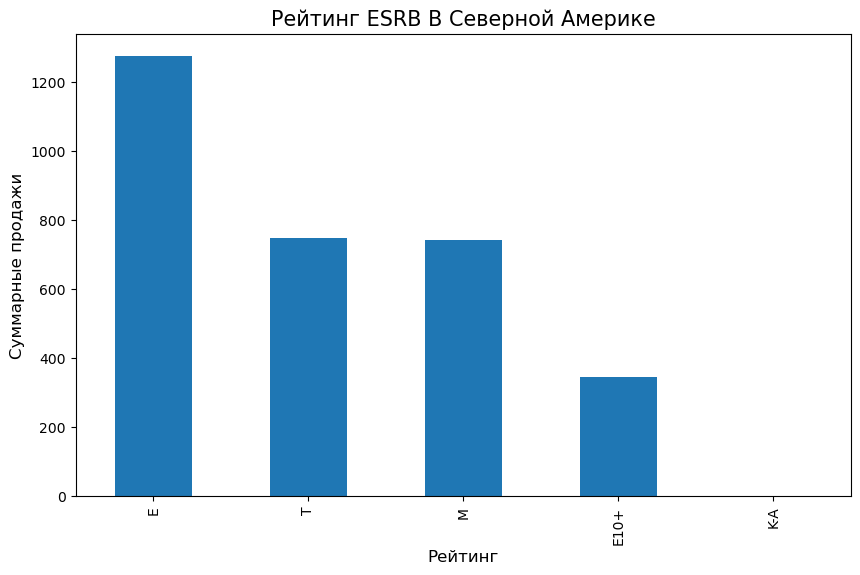

In [48]:
regional_top('rating', 'na_sales')
plt.title('Рейтинг ESRB В Северной Америке', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)

Игры подходящие для всех самые популярные, их покупают чаще всего. Далее идут игры для подростков и взрослых, практически в равных долях. 4 место- игры для детей от 10 лет.

Рассмотрим Европу:

Text(0.5, 0, 'Рейтинг')

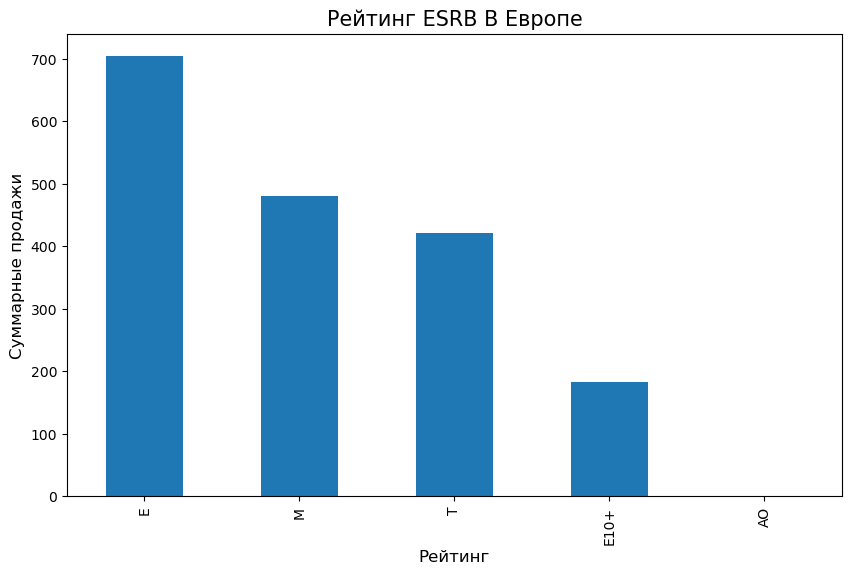

In [49]:
regional_top('rating', 'eu_sales')
plt.title('Рейтинг ESRB В Европе', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)

В Европе все аналогично Америке, только на последнем месте вместо "для всех" расположились игры только для взрослых, но их показатели очень малы.

Осталась Япония:

Text(0.5, 0, 'Рейтинг')

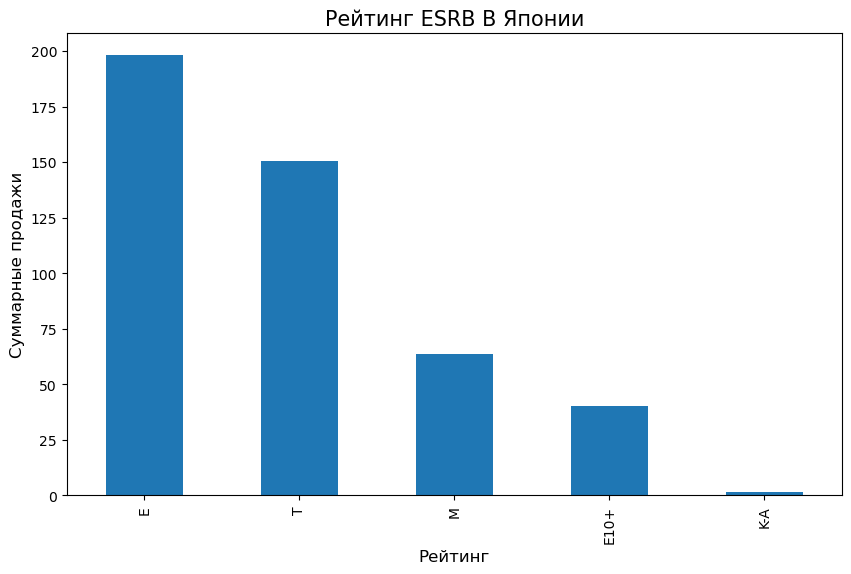

In [50]:
regional_top('rating', 'jp_sales')
plt.title('Рейтинг ESRB В Японии', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)

Категории все те же, но распределены иначе. На первом месте, как и везде, игры для всех. В Японии игры для подростков сильно оторвались от игр для взрослых, их продажи больше примерно в 2 раза. Далее, как в Америке и Европе, идут игры 10+ и снова игры для всех в устаревшем формате.

Можно сделать вывод, что рейтинг ESRB оказывает влияние на продажи в каждом регионе. Оказалось, что во всех регионах наиболее выгодной возрастной категорией является - для всех. Выпуская подобные игры, можно расссчитывать на хорошие продажи.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны\
Альтеративная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для проверки гипотезы будем использовать t-критерий Стьюдента, т.к. выборки независимы.

Будем проверять двустороннюю гипотезу о равенстве средних двух генеральных совокупностей. Пороговое значение alpha примем за 0.5

In [51]:
xboxone_score = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc_score = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

alpha = 0.05

result = st.ttest_ind(xboxone_score, pc_score)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается, а значит средние пользовательские оценки платформ Xbox One и PC не одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.\
Альтеративная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

Для проверки гипотезы будем использовать t-критерий Стьюдента, т.к. выборки независимы.

Будем проверять двустороннюю гипотезу о равенстве средних двух генеральных совокупностей. Пороговое значение alpha примем за 0.5

In [52]:
action_score = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
sports_score = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(action_score, sports_score)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.06480928064420527
Нет оснований отвергнуть нулевую гипотезу


Не может отвергнуть нулевую гипотезу, то есть пользовательские рейтинги жанров Action и Sports все же одинаковые. 

## Общий вывод

В ходе исследования были изучены данные интернет-магазина «Стримчик».\
На начальном этапе была проведена предобработка данных:
1. названия столбцов были приведены к нижнему регистру
2. были изменены типы данных в столбце года реализации и оценки пользователей
3. были обработаны пропуски в столбцах с оценками 
4. добавлен столбец с суммарными продажами по всем регионам

Далее был проведен исследовательский анализ:
1. Изучено, сколько игр выпускалось каждый год. Оказалось, что нужны не все данные, а лишь с 1994 года.
2. Были найдены платформы с наибольшими продажами и построено их распределение по годам.
3. Актуальными лидерами в промежутке за 2005-2015 год стали PS4, XOne и 3DS
4. Было выявлено, что каждая платформа живет в среднем около 10 лет, затем на смену ей приходит новая 
5. Было выявлено довольно сильное влияние оценок критиков на продажи, корреляция около 0.4
6. Самым прибыльными жанрами оказались action, sports и shooter

Был составлен портрет пользователя каждого региона. При этом можно отметить, что по всем параметрам Европа и Америка были очень похожи между собой, в то время как Япония всегда чем-либо выделялась.

Также было замечено, что самые прибыльные игры- возрастной категории для всех, в каждом регионе они пользуются большим спросом.

В завершение были проверены две гипотезы. Их результаты:
1) Средние пользовательские оценки платформ Xbox One и PC не одинаковые
2) Средние пользовательские рейтинги жанров Action и Sports равны

Подводя итоги, можно сказать, что на успешность игры влияет множестов факторов: жанр, возрастная категория, оценка критиков и даже регион, в котором они планируют продаваться. Вкусы людей разные и выбрать самые успешные продукты, для которых будет готовиться рекламная кампания некорректно, так как каждый любит свое. Тем не менее, можно сказать, что игры в жанре экшен для любых возрастов будут точно беспроигрышным вариантом для продвижения. Их всегда любили и до сих пор любят люди по всему миру.